In [1]:
%matplotlib inline

In [2]:
import pymongo
import pandas as pd

In [3]:
#configuracion mongo y conexion a db
client = pymongo.MongoClient("mongodb://localhost:27017/")
sentencias_db = client['Sentencias']
sentencias_coll = sentencias_db['Sentencias Judiciales']

In [5]:
with open("delitos.txt", encoding="utf-8") as file:
    lista_delitos = [l.rstrip("\n") for l in file]

In [6]:
df = pd.DataFrame(index=lista_delitos)
df['conteo'] = 0
df.head()

,conteo
extradición,0
traición,0
sometimiento total o parcial de la nación al dominio extranjero,0
espionaje,0
introducción clandestina y posesión de medio de espionaje,0


In [7]:
for delito in lista_delitos:
    veces_mencionado = sentencias_coll.count_documents( {"delitos": delito} )
    df['conteo'][delito]= veces_mencionado

In [8]:
df.sort_values('conteo',ascending=False)
df_mas_mencionados = df.sort_values('conteo',ascending=False).head(16)
df_mas_mencionados['delito'] = df_mas_mencionados.index

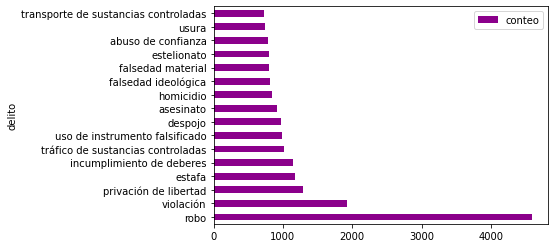

In [9]:
plt = df_mas_mencionados.plot.barh(x='delito', y='conteo', rot=0, color='#8B008B')

In [10]:
plt.figure.savefig('delitos_mas_comunes.png')